# UNSUPERVISED LEARNING PROJECCT

# THE SPARK FOUNDATION (GRIP) INTERNSHIP PROGRAM

# This Project Aim Is To Predict An Iris Flower Optimum Number Of Clusters Visually Using The Clustering Algorithm

# IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.shape

(150, 6)

## The "Species" column is the Target Variable but since this project is an unsupervised learning, We'll have to drop it... together with the "Id" column

In [9]:
df.drop(['Species', 'Id'], axis=1, inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

## Data Visualization

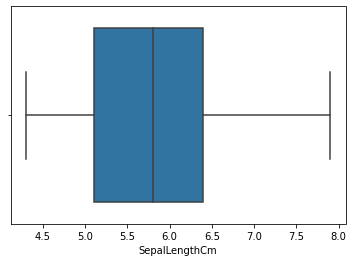

In [12]:
sns.boxplot(x=df['SepalLengthCm']);

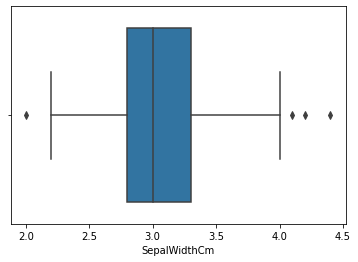

In [13]:
sns.boxplot(x=df['SepalWidthCm']);

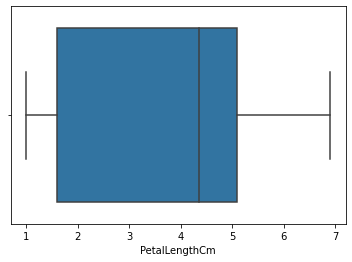

In [14]:
sns.boxplot(x=df['PetalLengthCm']);

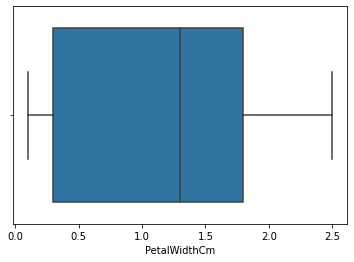

In [15]:
sns.boxplot(x=df['PetalWidthCm']);

## The visualization above indicates that we have outliers in the "SepalWidth" Column and we'll have to get rid of those Outliers

## Getting rid Of The Outliers Using MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X = scaler.fit_transform(df)

In [18]:
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## Generating Clusters that'll best fit the model by looping through n_cluster and also Plotting an Elbow graph to visualize the cluster to fit the model

In [19]:
no_of_clusters = range(2,10)
inertia = []

In [20]:
for i in no_of_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    inertia.append(kmeans.inertia_)

## Plotting The Elbow Graph

In [21]:
len(no_of_clusters)

8

In [22]:
len(inertia)

8

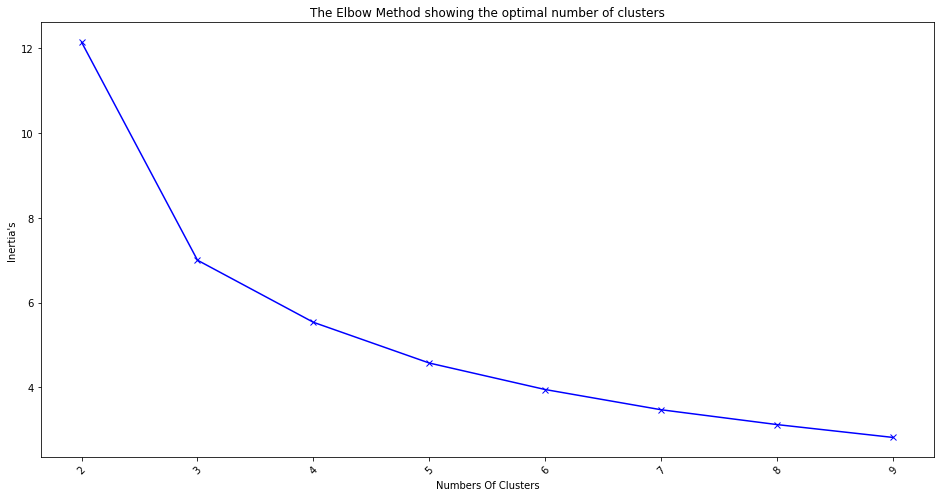

In [23]:
plt.figure(figsize=(16,8))
plt.plot(no_of_clusters, inertia, 'bx-')
plt.xticks(no_of_clusters)
plt.title('The Elbow Method showing the optimal number of clusters')
plt.xlabel('Numbers Of Clusters')
plt.ylabel('Inertia\'s')
plt.xticks(rotation=(45))
plt.show()

## The plot best curve appeared in cluster 3, So we have to use 3 clusters to fit our model

In [24]:
# Build The Model
model = KMeans(n_clusters=3, random_state=42)

In [25]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [26]:
labels = model.predict(X)

In [27]:
model.inertia_

6.998114004826762

In [28]:
model.cluster_centers_

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

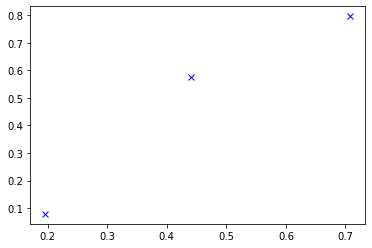

In [29]:
# sns.scatterplot(x=df['SepalLengthCm'], y=df['PetalLengthCm'], hue=labels)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb');

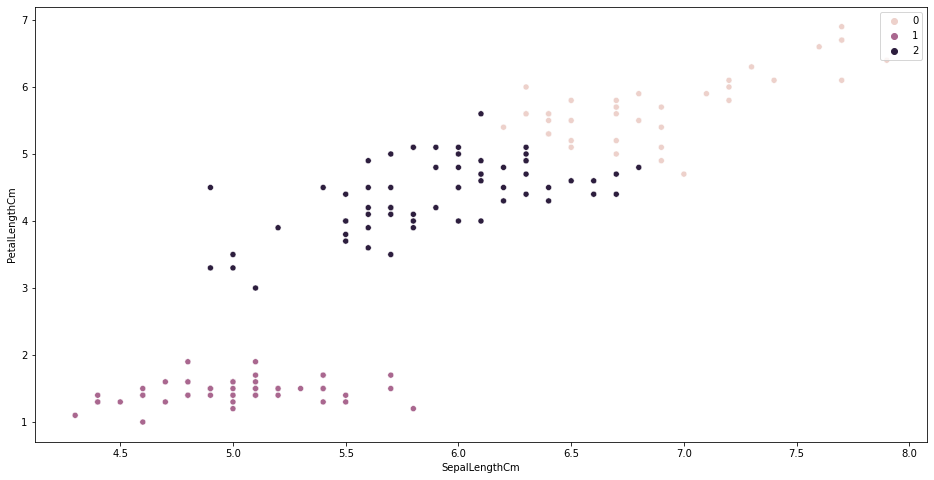

In [30]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df['SepalLengthCm'], y=df['PetalLengthCm'], hue=labels)
plt.show()